# NORM NETWORK BUILT ON 658 STUDY SUBREDDITS AND SUBSAMPLES

In [6]:
limit = 100
threshold = 996/1000

USING ALL 658 SUBREDDITS IN NETWORK
Scaling
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Name: 
Type: Graph
Number of nodes: 658
Number of edges: 868
Average degree:   2.6383
Density:  0.004015674082709932
False
Triadic closure: 0.1857976653696498
Network diameter of largest component: 45
['2007scape', 'ABCDesis', 'AdviceAnimals', 'Anarchism', 'Art', 'AskMen', 'AskReddit', 'AskThe_Donald', 'AskWomen', 'BigBrother', 'BikiniBottomTwitter', 'BlackPeopleTwitter', 'CODZombies', 'Catholicism', 'Celebs', 'ClashRoyale', 'CollegeBasketball', 'Cricket', 'DBZDokkanBattle', 'DC_Cinematic', 'DCcomics', 'DarkNetMarkets', 'DestinyTheGame', 'DotA2', 'Drugs', 'EliteDangerous', 'EnoughTrumpSpam', 'FashionReps', 'Fitness', 'ForeverAlone', 'Fuckthealtright', 'GamerGhazi', 'GetMotivated', 'GlobalOffensive', 'Guildwars2', 'HighQualityGifs', 'HillaryForPrison', 'HumansBeingBros', 'Incels', 'Israel', 'JUSTNOMIL', 'Jokes', 'Kanye', 'Kos

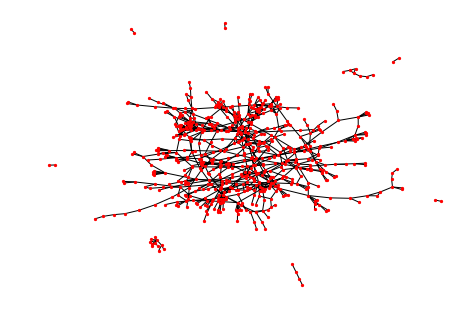

In [7]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

datapath = "/Users/eshwar/Downloads/fastText-0.1.0/"
data = np.loadtxt(datapath + 'xor-inter-subreddit-agreement.csv')

# subsample = "bottom"
# subsample = "top"
subsample = "all"

# limit = 100
# threshold = 997/1000

if subsample == "top":
    ####only use the top 100 subs, sorted based on number of removals obtained
    print("ONLY TOP 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i][j]

    col_subs = pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][:limit]

elif subsample == "bottom":
    ###build the networks different only for last 100 subs
    print("ONLY LAST 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))
    total = len(data) - limit

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i + total][j + total]

    col_subs = list(pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][total:])

else:
    ###no limits
    print("USING ALL 658 SUBREDDITS IN NETWORK")
    tmp = data
    col_subs = pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit']

#################
num_subs = len(tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.5
#     tmp[i][i] = (tmp[1][:i].sum() + tmp[1][i+1:].sum())/(num_subs-1)

print("Scaling")
# print(tmp)
# https://gist.github.com/perrygeo/4512375
def scale_linear_bycolumn(rawpoints, high=1.0, low=0.0):
    mins = np.min(rawpoints, axis=0)
    maxs = np.max(rawpoints, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rng)

tmp = scale_linear_bycolumn(tmp)
# # np.savetxt('normalized-interexpert-agreement.txt', tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.0

# ###discretize agreement into 3 bins: if agreement 0,1,2
# # lel = np.loadtxt('normalized-interexpert-agreement.txt')
# bin1 = 5/10
# bin2 = 7/10
# bins = np.array([bin1, bin2])

bin1 = threshold
bins = np.array([bin1])

# adjacency_matrix = tmp
adjacency_matrix = np.digitize(tmp, bins)

print(adjacency_matrix)

###load edge by edge
###alt: insert nodes one by one - 

import networkx as nx
G = nx.Graph()
G.add_nodes_from(col_subs)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
            weight = adjacency_matrix[i][j]
            if weight < 1:
                continue
            G.add_edge(col_subs[i], col_subs[j], weight = weight, color = 'blue')


pos = nx.spring_layout(G,scale=5)

nx.draw(G,pos,font_size=8, with_labels=False, node_size=5)

print(nx.info(G))
print("Density: ", nx.density(G))
print(nx.is_connected(G))

triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

pos = nx.spring_layout(G, scale=5)

# nx.draw(subgraph,pos,font_size=8, with_labels=False, node_size=1)

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

count = 0
for c in sorted(map(sorted, next_level_communities)):
    print(c)
    count += 1
    print("\n\n\n")
print(count)

plt.savefig('figures/' + subsample + '.pdf')

ONLY TOP 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS
Scaling
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 107
Average degree:   2.1400
Density:  0.021616161616161617
False
Triadic closure: 0.08157099697885196
Network diameter of largest component: 8
['2007scape', 'DestinyTheGame', 'GetMotivated', 'GlobalOffensive', 'GlobalOffensiveTrade', 'OldSchoolCool', 'Overwatch', 'TheSilphRoad', 'anime', 'aww', 'explainlikeimfive', 'funny', 'gifs', 'hearthstone', 'jailbreak', 'leagueoflegends', 'nosleep', 'pics', 'pokemongo', 'tifu', 'videos']




['Android', 'BlackPeopleTwitter', 'DIY', 'EnoughTrumpSpam', 'IAmA', 'Incels', 'LateStageCapitalism', 'LifeProTips', 'PurplePillDebate', 'SandersForPresident', 'ShitRedditSays', 'SubredditDrama', 'TwoXChromosomes', 'UpliftingNews', 'atheism', 'canada', 'conspiracy', 'creepyPMs', 'europe', 'fantasyfootball', 'hillar

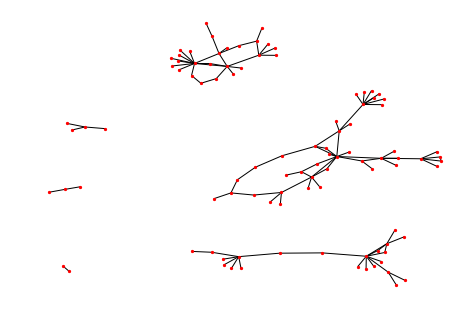

In [8]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

datapath = "/Users/eshwar/Downloads/fastText-0.1.0/"
data = np.loadtxt(datapath + 'xor-inter-subreddit-agreement.csv')

# subsample = "bottom"
subsample = "top"
# subsample = "all"

# limit = 100
# threshold = 997/1000

if subsample == "top":
    ####only use the top 100 subs, sorted based on number of removals obtained
    print("ONLY TOP 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i][j]

    col_subs = pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][:limit]

elif subsample == "bottom":
    ###build the networks different only for last 100 subs
    print("ONLY LAST 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))
    total = len(data) - limit

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i + total][j + total]

    col_subs = list(pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][total:])

else:
    ###no limits
    print("USING ALL 658 SUBREDDITS IN NETWORK")
    tmp = data
    col_subs = pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit']

#################
num_subs = len(tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.5
#     tmp[i][i] = (tmp[1][:i].sum() + tmp[1][i+1:].sum())/(num_subs-1)

print("Scaling")
# print(tmp)
# https://gist.github.com/perrygeo/4512375
def scale_linear_bycolumn(rawpoints, high=1.0, low=0.0):
    mins = np.min(rawpoints, axis=0)
    maxs = np.max(rawpoints, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rng)

tmp = scale_linear_bycolumn(tmp)
# # np.savetxt('normalized-interexpert-agreement.txt', tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.0

# ###discretize agreement into 3 bins: if agreement 0,1,2
# # lel = np.loadtxt('normalized-interexpert-agreement.txt')
# bin1 = 5/10
# bin2 = 7/10
# bins = np.array([bin1, bin2])

bin1 = threshold
bins = np.array([bin1])

# adjacency_matrix = tmp
adjacency_matrix = np.digitize(tmp, bins)

print(adjacency_matrix)

###load edge by edge
###alt: insert nodes one by one - 

import networkx as nx
G = nx.Graph()
G.add_nodes_from(col_subs)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
            weight = adjacency_matrix[i][j]
            if weight < 1:
                continue
            G.add_edge(col_subs[i], col_subs[j], weight = weight, color = 'blue')


pos = nx.spring_layout(G,scale=5)

nx.draw(G,pos,font_size=8, with_labels=False, node_size=5)

print(nx.info(G))
print("Density: ", nx.density(G))
print(nx.is_connected(G))

triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

pos = nx.spring_layout(G, scale=5)

# nx.draw(subgraph,pos,font_size=8, with_labels=False, node_size=1)

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

count = 0
for c in sorted(map(sorted, next_level_communities)):
    print(c)
    count += 1
    print("\n\n\n")
print(count)

plt.savefig('figures/' + subsample + '.pdf')

ONLY LAST 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS
Scaling
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 108
Average degree:   2.1600
Density:  0.02181818181818182
False
Triadic closure: 0.17410714285714285
Network diameter of largest component: 10
['3DS', 'Edmonton']




['AgainstHateSubreddits', 'DebateAChristian', 'Denmark', 'DnDBehindTheScreen', 'Nootropics', 'OnePieceTC', 'TrollYChromosome', 'socialjustice101', 'torrents', 'truegaming']




['BDSMcommunity', 'GameTrade', 'GrandTheftAutoV', 'KotakuInAction', 'LivestreamFail', 'Sat', 'Vive', 'blackpeoplegifs', 'buildapcforme', 'cosplay', 'justneckbeardthings', 'paradoxplaza', 'progresspics', 'tech']




['BikiniBottomTwitter', 'MakingaMurderer', 'ShitWehraboosSay', 'TexasRangers', 'WayOfTheBern', 'blackladies', 'instant_regret', 'oddlysatisfying']




['BravoRealHousewives', 'BreedingDittos

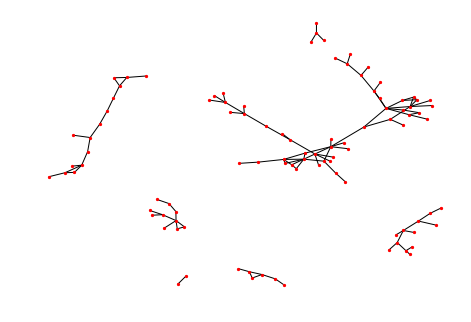

In [9]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

datapath = "/Users/eshwar/Downloads/fastText-0.1.0/"
data = np.loadtxt(datapath + 'xor-inter-subreddit-agreement.csv')

subsample = "bottom"
# subsample = "top"
# subsample = "all"

# limit = 100
# threshold = 997/1000

if subsample == "top":
    ####only use the top 100 subs, sorted based on number of removals obtained
    print("ONLY TOP 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i][j]

    col_subs = pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][:limit]

elif subsample == "bottom":
    ###build the networks different only for last 100 subs
    print("ONLY LAST 100 SUBREDDITS: SORTED ON NUMBER OF AVAILABLE REMOVALS")
    tmp = np.zeros((limit, limit))
    total = len(data) - limit

    for i in range(limit):
        for j in range(limit):
            tmp[i][j] = data[i + total][j + total]

    col_subs = list(pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit'][total:])

else:
    ###no limits
    print("USING ALL 658 SUBREDDITS IN NETWORK")
    tmp = data
    col_subs = pd.read_csv('~/Desktop/research/data/study-subreddits.csv', names= ['subreddit'])['subreddit']

#################
num_subs = len(tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.5
#     tmp[i][i] = (tmp[1][:i].sum() + tmp[1][i+1:].sum())/(num_subs-1)

print("Scaling")
# print(tmp)
# https://gist.github.com/perrygeo/4512375
def scale_linear_bycolumn(rawpoints, high=1.0, low=0.0):
    mins = np.min(rawpoints, axis=0)
    maxs = np.max(rawpoints, axis=0)
    rng = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rng)

tmp = scale_linear_bycolumn(tmp)
# # np.savetxt('normalized-interexpert-agreement.txt', tmp)

for i in range(0,num_subs):
    tmp[i][i] = 0.0

# ###discretize agreement into 3 bins: if agreement 0,1,2
# # lel = np.loadtxt('normalized-interexpert-agreement.txt')
# bin1 = 5/10
# bin2 = 7/10
# bins = np.array([bin1, bin2])

bin1 = threshold
bins = np.array([bin1])

# adjacency_matrix = tmp
adjacency_matrix = np.digitize(tmp, bins)

print(adjacency_matrix)

###load edge by edge
###alt: insert nodes one by one - 

import networkx as nx
G = nx.Graph()
G.add_nodes_from(col_subs)

for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix)):
            weight = adjacency_matrix[i][j]
            if weight < 1:
                continue
            G.add_edge(col_subs[i], col_subs[j], weight = weight, color = 'blue')


pos = nx.spring_layout(G,scale=5)

nx.draw(G,pos,font_size=8, with_labels=False, node_size=5)

print(nx.info(G))
print("Density: ", nx.density(G))
print(nx.is_connected(G))

triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

pos = nx.spring_layout(G, scale=5)

# nx.draw(subgraph,pos,font_size=8, with_labels=False, node_size=1)

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

count = 0
for c in sorted(map(sorted, next_level_communities)):
    print(c)
    count += 1
    print("\n\n\n")
print(count)

plt.savefig('figures/' + subsample + '.pdf')